In [1]:
import numpy as np
from os.path import expanduser
import os
import json
import theano
import pyret.filtertools as ft
import pyret.visualizations as pyviz
import deepretina.visualizations as viz
from deepretina.preprocessing import datagen, loadexpt
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.optimize import minimize
from numpy.linalg import norm
%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GT 750M (CNMeM is disabled)


In [3]:
stimuli_filename = 'differentiated_stimuli.h5'
stimuli_dirs = [expanduser('~/Dropbox/deep-retina/saved/lenna.salamander/2015-11-11 09.44.27 Maximal Differentiated Stimuli/'),
                expanduser('~/Dropbox/deep-retina/saved/lane.local.lmcintosh/2015-11-11 10.02.21 Maximal Differentiated Stimuli/'),
               expanduser('~/Dropbox/deep-retina/saved/lenna.salamander/2015-11-11 14.12.00 Maximal Differentiated Stimuli/')]           

In [4]:
stimuli = []
for d in stimuli_dirs:
    stimuli.append(h5py.File(d + stimuli_filename, 'r'))

In [6]:
one_stimuli = stimuli[2]['stimulus']

In [7]:
space, time = ft.decompose(np.copy(one_stimuli))

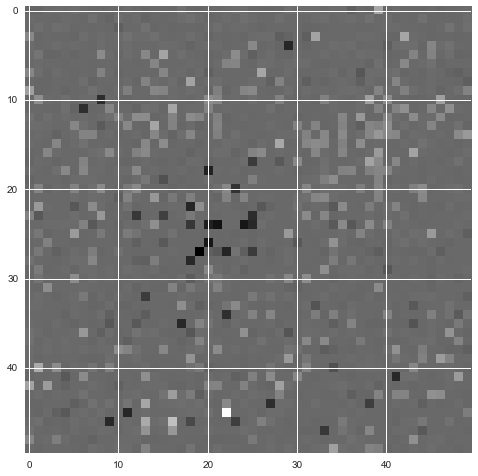

In [8]:
plt.imshow(space)

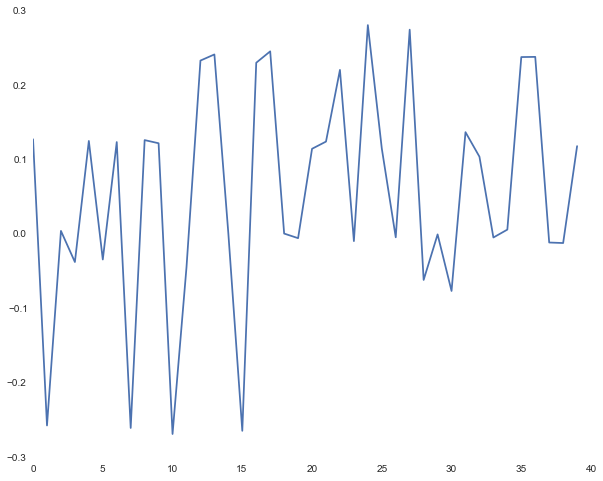

In [9]:
plt.plot(time)

# What do the responses look like?

In [10]:
architecture_filename = 'architecture.json'
#whitenoise_data_dir = expanduser('~/Dropbox/deep-retina/saved/lenna.salamander/2015-11-08 15.42.33 convnet/')
#whitenoise_weight_filename = 'epoch018_iter01300_weights.h5' # .63 cc on held-out
naturalscenes_data_dir = expanduser('~/Dropbox/deep-retina/saved/lenna.salamander/2015-11-07 16.52.44 convnet/')
naturalscenes_weight_filename = 'epoch038_iter02700_weights.h5' # .53 cc on held-out
ln_data_dir = expanduser('~/Dropbox/deep-retina/saved/lenna.nirum/2015-11-08 04.41.18 LN/')
ln_weight_filename = 'epoch010_iter00750_weights.h5' # .468 cc on held-out

In [11]:
naturalscenes_architecture_data = open(naturalscenes_data_dir + architecture_filename, 'r')
naturalscenes_architecture_string = naturalscenes_architecture_data.read()
naturalscenes_model = model_from_json(naturalscenes_architecture_string)
naturalscenes_model.load_weights(naturalscenes_data_dir + naturalscenes_weight_filename)

In [12]:
ln_architecture_data = open(ln_data_dir + architecture_filename, 'r')
ln_architecture_string = ln_architecture_data.read()
ln_model = model_from_json(ln_architecture_string)
ln_model.load_weights(ln_data_dir + ln_weight_filename)

In [16]:
input_stim = np.copy(one_stimuli).reshape((1,40,50,50))

In [17]:
ln_model.predict(input_stim)

array([[  2.74050916e+13]])

In [18]:
naturalscenes_model.predict(input_stim)

array([[  2.31120411e+12]])

In [19]:
from numpy.linalg import norm

In [20]:
norm(input_stim[:])

741667873041645.0